In [5]:
import numpy as np
import cv2
from matplotlib.colors import Normalize


In [6]:
# Load the RGB image
try:
    rgb_img = cv2.imread('/media/tairo/Storages/CodeThayTien/XLA/ImgTest/kodim22t.jpg')
    rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
    rgb_img = rgb_img / 255.0  # Normalize to [0, 1]
except:
    raise FileNotFoundError('Could not load image file kodim22t.jpg')

rows, cols, _ = rgb_img.shape


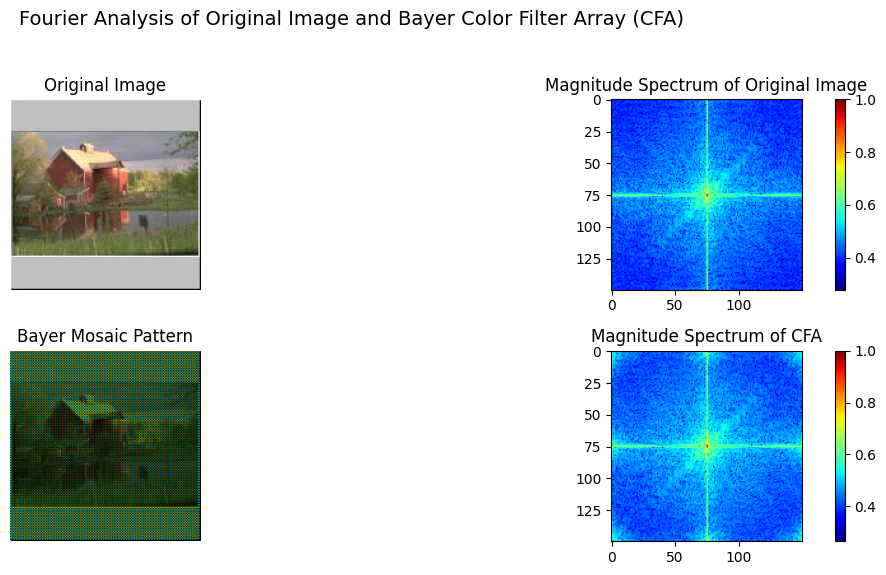

In [ ]:
cfa_img = np.zeros((rows, cols)) #Convert RGB image into Bayer CFA pattern (Mosaic)

# Sample R, G, B according to Bayer pattern RGGB
for i in range(rows):
    for j in range(cols):
        if i % 2 == 1 and j % 2 == 1:  # Red at (odd, odd)
            cfa_img[i, j] = rgb_img[i, j, 0]
        elif i % 2 == 0 and j % 2 == 0:  # Blue at (even, even)
            cfa_img[i, j] = rgb_img[i, j, 2]
        else:  # Green at (odd, even) or (even, odd)
            cfa_img[i, j] = rgb_img[i, j, 1]

# Create a color visualization of the Bayer pattern
bayer_colored = np.zeros((rows, cols, 3))
for i in range(rows):
    for j in range(cols):
        if i % 2 == 1 and j % 2 == 1:  # Red at (odd, odd)
            bayer_colored[i, j, 0] = cfa_img[i, j]
        elif i % 2 == 0 and j % 2 == 0:  # Blue at (even, even)
            bayer_colored[i, j, 2] = cfa_img[i, j]
        else:  # Green at (odd, even) or (even, odd)
            bayer_colored[i, j, 1] = cfa_img[i, j]

gray_original = cv2.cvtColor((rgb_img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY) / 255.0 #Apply 2D Discrete Fourier Transform (DFT)

# Fourier Transform of the original image
S_orig = np.fft.fft2(gray_original)
S_orig_shift = np.fft.fftshift(S_orig)
S_orig_magnitude = np.abs(S_orig_shift)

# Fourier Transform of the Bayer CFA pattern
S_cfa = np.fft.fft2(cfa_img)
S_cfa_shift = np.fft.fftshift(S_cfa)
S_cfa_magnitude = np.abs(S_cfa_shift)

#Display Results
plt.figure(figsize=(12, 6))

# Original RGB Image
plt.subplot(2, 2, 1)
plt.imshow(rgb_img)
plt.title('Original Image', fontsize=12)
plt.axis('off')

# Magnitude Spectrum of Original Image
plt.subplot(2, 2, 2)
scaled_orig_mag = S_orig_magnitude / np.max(S_orig_magnitude)
gamma = 0.1  # Apply gamma correction
enhanced_orig_mag = scaled_orig_mag ** gamma
plt.imshow(enhanced_orig_mag, cmap='jet', norm=Normalize())
plt.colorbar()
plt.title('Magnitude Spectrum of Original Image', fontsize=12)

# Bayer Mosaic Pattern
plt.subplot(2, 2, 3)
plt.imshow(bayer_colored)
plt.title('Bayer Mosaic Pattern', fontsize=12)
plt.axis('off')

# Magnitude Spectrum of Bayer CFA
plt.subplot(2, 2, 4)
scaled_cfa_mag = S_cfa_magnitude / np.max(S_cfa_magnitude)
enhanced_cfa_mag = scaled_cfa_mag ** gamma
plt.imshow(enhanced_cfa_mag, cmap='jet', norm=Normalize())
plt.colorbar()
plt.title('Magnitude Spectrum of CFA', fontsize=12)

plt.suptitle('Fourier Analysis of Original Image and Bayer Color Filter Array (CFA)', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [8]:
# Step 4: Print Information about the Spectra
print(f'Original Image Spectrum - Max magnitude: {np.max(S_orig_magnitude):.6f}, ')
print(f'Mean magnitude: {np.mean(S_orig_magnitude):.6f}, ')
print(f'Ratio: {np.max(S_orig_magnitude) / np.mean(S_orig_magnitude):.6f}\n')

print(f'CFA Spectrum - Max magnitude: {np.max(S_cfa_magnitude):.6f}, ')
print(f'Mean magnitude: {np.mean(S_cfa_magnitude):.6f}, ')
print(f'Ratio: {np.max(S_cfa_magnitude) / np.mean(S_cfa_magnitude):.6f}\n')

Original Image Spectrum - Max magnitude: 12391.858824, 
Mean magnitude: 8.394177, 
Ratio: 1476.244631

CFA Spectrum - Max magnitude: 12187.145098, 
Mean magnitude: 9.257423, 
Ratio: 1316.472680

